<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 13.4 Formulation of Chosen Cases in Terms of Basis Functions

#### Example 13.2: Vectorized Polynomial Regression in Python
Create the data set. There, both X and y must be column vectors which we ensure by using the `reshape` function. The two parameters mean: "1": reshape into 1 column, "-1" use as many rows as required such that the total number of elements in the matrix after reshaping is preserved.

In [2]:
import numpy as np

X = np.array([1.1, 1.4, 2.1, 3.1, 3.7, 4.2]).reshape(-1, 1)
y = np.array([1.2, 1.5, 1.7, 2.1, 2.3, 2.9]).reshape(-1, 1)
n_records = X.shape[0] # number of rows = number of data records

Next, we initialize the "extended feature matrix" as a Vandermonde matrix.
The function `numpy.vander` requires the first argument to be a 1D array, which can be achieved using the `flatten()` function. Setting `increasing=True` defines that the  "1s" form the first column and not the first row.

In [3]:
polynomial_degree = 3
IX = np.vander(X.flatten(), N=polynomial_degree + 1, increasing=True)
IX

array([[ 1.   ,  1.1  ,  1.21 ,  1.331],
       [ 1.   ,  1.4  ,  1.96 ,  2.744],
       [ 1.   ,  2.1  ,  4.41 ,  9.261],
       [ 1.   ,  3.1  ,  9.61 , 29.791],
       [ 1.   ,  3.7  , 13.69 , 50.653],
       [ 1.   ,  4.2  , 17.64 , 74.088]])

Next, we define some numerical parameters as well as the initial values for the weights vector.

In [4]:
learning_rate = 0.0005
max_steps = 10000000
tolerance = 5e-7

weights = np.array([0.2, 0.2, -0.2, 0.2]).reshape(-1,1)

Finally, we do the SD minimization in analogy to what was done in the previous chapter.

<div class="alert alert-block alert-info">
Note that you cannot run this cell twice because the second time the iteration starts with the current value of <tt>weights</tt>. Therefore, you need to execute the cell above to initialize the weights.
</div>


In [5]:
# This for-loop might take a long time!
for step in range(max_steps):
    if step % 20000 == 0: print('.', end='', flush=True)

    residual = y - IX @ weights       # reminder: "@" is the matrix-vector product
    grad_of_loss = - 2 / n_records * IX.T @ residual  
    weights_increment = -learning_rate * grad_of_loss
    weights += weights_increment

    if np.linalg.norm(weights_increment) < tolerance:
        print('\nfinished.\n')
        break
else:
    assert False, "max. number of steps reached"

print("|weight increment|    =", np.linalg.norm(weights_increment))
print("final loss value      =", (residual.T @ residual / n_records)[0,0])
print("number of steps taken =", step)
print("computed weights      :", weights.flatten())
print("closed form weights   :", (np.linalg.inv(IX.T @ IX) @ IX.T @ y).flatten())

..................................................................................
finished.

|weight increment|    = 4.999996546878193e-07
final loss value      = 0.002882401789420955
number of steps taken = 1620612
computed weights      : [-0.19861264  1.96952451 -0.70613782  0.09787801]
closed form weights   : [-0.53150882  2.42437848 -0.88765607  0.11996224]


As always, we create a figure and visualize our results. Comparing them to the closed form solution is also a good sanity check (e.g., also because it is not obvious if the difference between the computed weights and the closed form weights is in fact only a small difference or if it is large).

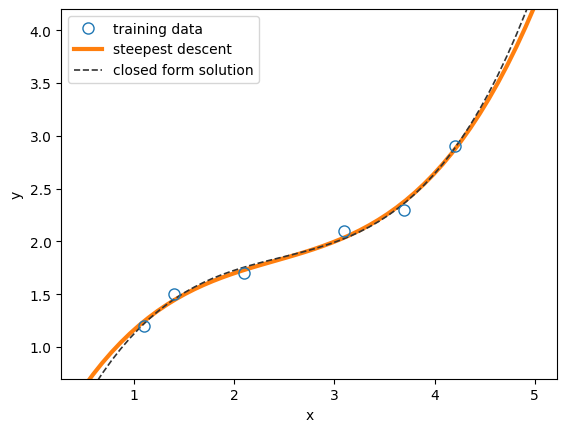

In [6]:
fig, ax = plt.subplots()
ax.plot(X, y, marker='o', lw=0, ms=8, mfc='none', color='C0', label='training data', zorder=99)

_x = np.linspace(0.5, 5)
_IX = np.vander(_x, N=polynomial_degree + 1, increasing=True)
ana_weights = np.linalg.inv(IX.T @ IX) @ IX.T @ y

ax.plot(_x, (_IX @ weights).flatten(), marker='', c='C1', lw=3, ls='-', label='steepest descent')
ax.plot(_x, (_IX @ ana_weights).flatten(), marker='', c='0.2', lw=1.2, ls='--', label='closed form solution')
ax.legend()
ax.set(xlabel='x', ylabel='y', ylim=(0.7, 4.2));